# Exploring Workforce Dynamics with Python: A Comprehensive Analysis of Gender Distribution, Educational Qualifications, Recruitment Trends, and Leave Behavior

## About dataset

### Context

The dataset used here encompasses information regarding employees in a company, such as educational backgrounds, work history, demographics, and employment-related factors. 

### Data availability

This data is retrieved from https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset under the license of CC9: Public Domain with a usability of 9.41.

The dataset has been already anonymized for privacy.

## Aims of the project 

Herein, it is set out to address the following issues:

* What is the distribution of the gender in the company? What percentage of employees are male and female?

* Which educational qualification appears to be the most prevalent among the surveyed employees?

* Are there any observable relationship between gender and educational attainment?

* Are there any noticeable fluctuations or patterns in the recruitment activity over the years?

* Is there any observable correlation between experience in the current domain and payment tier?

*  Is there any correlation between employees' propensity to take leave and their joining year, payment tier, age, or experience in the domain?

* How does the percentage of leave-taking behavior vary among employees with different educational backgrounds?

* Are there any noticeable disparities in leave behavior between employees in different cities?

* How does the percentage of leave-taking behavior differ between female and male employees?

* What conclusions can be drawn regarding the effect of assigning temporary tasks on leave-taking behavior?

### Step-1: Installing necessary libraries


In [1]:
import warnings
warnings.filterwarnings('ignore')
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step-2: Retrieving the dataset

In [2]:
od.download('https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset')

Skipping, found downloaded files in "./employee-dataset" (use force=True to force download)


### Step-3: Exploring the dataset

In [3]:
df = pd.read_csv('employee-dataset/Employee.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


### Step-4: Data wrangling

#### Step-4.1: Remove duplicates, if any

In [5]:
num_dup = df.duplicated().sum()
if num_dup != 0 :
    print('There are ', num_dup, 'duplicated rows.')
    df.drop_duplicates(inplace=True)
    print('All the duplicates have been removed!')
else :
    print('No duplicates exists in the dataset.')

There are  1889 duplicated rows.
All the duplicates have been removed!


#### Step-4.2: Spotting missing entries, if any

In [6]:
col_name = df.columns.to_list()
for col in col_name : 
    print(col, df[col].isnull().sum())

Education 0
JoiningYear 0
City 0
PaymentTier 0
Age 0
Gender 0
EverBenched 0
ExperienceInCurrentDomain 0
LeaveOrNot 0


## Analysis of the dataset

### 1. What is the distribution of the gender in the company? What percentage of employees are male and female?

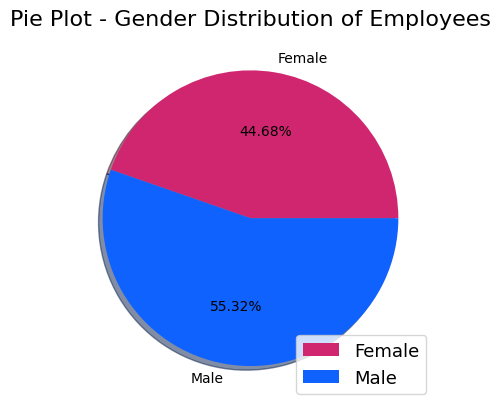

In [7]:
df_gen = df.groupby('Gender')[['Gender']].count()
df_gen.plot(kind='pie', y='Gender', colors=['#d02670','#0f62fe'], autopct='%1.2f%%', shadow=True)
plt.title('Pie Plot - Gender Distribution of Employees', fontsize='16')
plt.legend(loc=4, fontsize=13)
plt.ylabel('')
plt.show()

* The pie chart shows the percentages of male and female employees in the company.
* 55.32 % of employees are male, whereas 44.68% of employees are female.

### 2. Which educational qualification appears to be the most prevalent among the surveyed employees?

In [8]:
df_ed=df.groupby('Education')['Education'].count()
df_ed.head()

Education
Bachelors    1971
Masters       637
PHD           156
Name: Education, dtype: int64

Text(0.5, 1.0, 'Bar Plot - Distribution of Educational Qualifications')

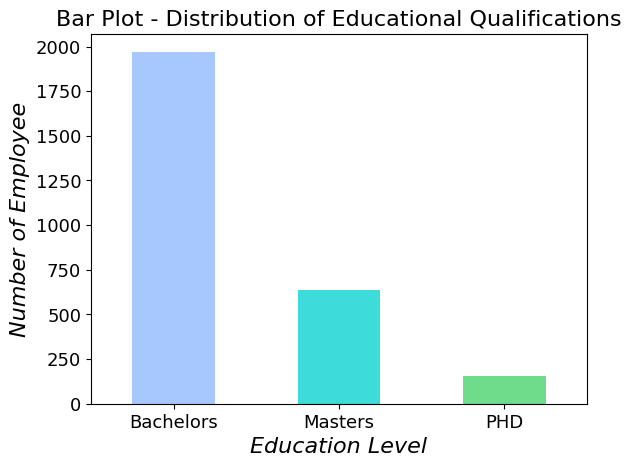

In [9]:
df_ed.plot(kind='bar', x='Education', color=['#a6c8ff','#3ddbd9','#6fdc8c'])
plt.xticks(rotation=0, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Education Level',fontsize='16', style='italic')
plt.ylabel('Number of Employee', fontsize='16', style='italic')
plt.title('Bar Plot - Distribution of Educational Qualifications', fontsize='16')

* The column chart represents the educational qualifications of employees, highlighting the number of individuals with B.Sc., M.Sc., and Ph.D. degrees.
* There are 1971 employees with B.Sc., 637 with M.Sc., and 156 with Ph.D. degrees.
* The data reveals that the majority of employees possess a B.Sc. degree.

### 3. Are there any observable relationship between gender and educational attainment?

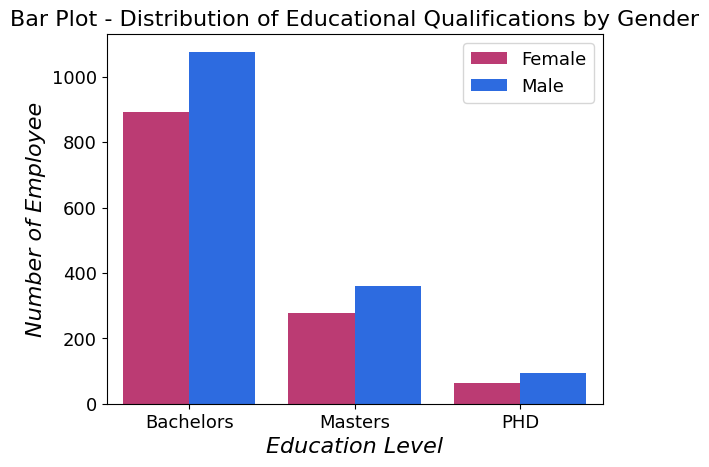

In [10]:
df_ed_gender=df.groupby(['Education','Gender'])[['Gender']].count()
df_ed_gender.rename(columns={'Gender':'Count'}, inplace=True)
df_ed_gender.reset_index(inplace=True)
palette = {'Female':'#d02670','Male':'#0f62fe'}
sns.barplot(data=df_ed_gender, x='Education', y='Count', hue='Gender', palette=palette)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
plt.xlabel('Education Level',fontsize='16', style='italic')
plt.ylabel('Number of Employee', fontsize='16', style='italic')
plt.title('Bar Plot - Distribution of Educational Qualifications by Gender', fontsize='16')
plt.show()

* The column chart illustrates the distribution of employees based on gender and their respective educational qualifications.
* Upon examination, there appears to be no discernible correlation between gender and attainment of higher levels of education qualifications.

### 4. Are there any noticeable fluctuations or patterns in the recruitment activity over the years?

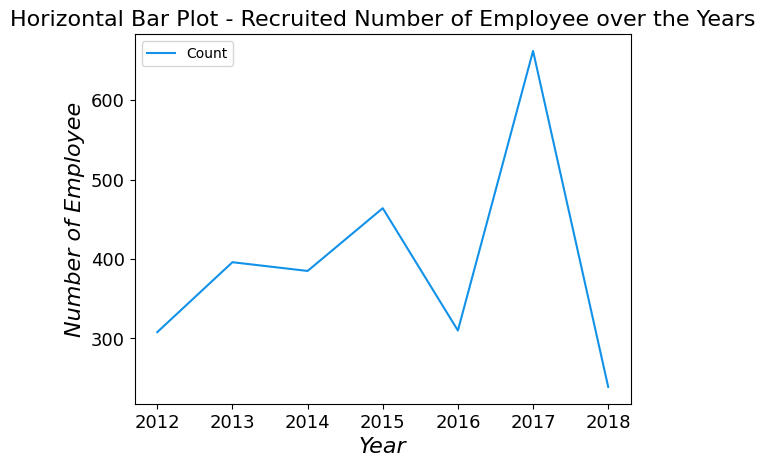

In [11]:
df_join = df.groupby(['JoiningYear'])[['JoiningYear']].count()
df_join.rename(columns={'JoiningYear':'Count'}, inplace=True)
df_join.reset_index(inplace=True)
df_join.plot(kind='line', x='JoiningYear', y='Count', color=['#1192e8'])
plt.xticks(rotation=0, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year',fontsize='16', style='italic')
plt.ylabel('Number of Employee', fontsize='16', style='italic')
plt.title('Horizontal Bar Plot - Recruited Number of Employee over the Years', fontsize='16')
plt.show()

* The line plot illustrates the annual recruitment patterns of employees.
* The year 2017 saw the highest recruitment activity, with a total of 662 employees hired during that period.
* In contrast to 2018, the recruitment trend significantly went down in 2016 (310 employees) and 2018 (239 employees). 

### 5. Is there any observable correlation between experience in the current domain and payment tier?

In [24]:
df[['ExperienceInCurrentDomain', 'PaymentTier']].corr(method='pearson')

,ExperienceInCurrentDomain,PaymentTier
ExperienceInCurrentDomain,1.000000,-0.004602
PaymentTier,-0.004602,1.000000


* The Pearson's correlation coefficient between experience in the current domain and payment tier, -0.004602, shows the lack of correlation between the experience and payment. 


### 6. Is there any correlation between employees' propensity to take leave and their joining year, payment tier, age, or experience in the domain?

In [22]:
df.corr(numeric_only=True)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.053823,0.024445,-0.031228,0.150650
PaymentTier,-0.053823,1.000000,0.067514,-0.004602,-0.119891
Age,0.024445,0.067514,1.000000,-0.053276,-0.114943
ExperienceInCurrentDomain,-0.031228,-0.004602,-0.053276,1.000000,-0.021181
LeaveOrNot,0.150650,-0.119891,-0.114943,-0.021181,1.000000


* Leave-taking behavior is not strongly correlated with joining year (0.150650), payment tier (-0.119891), age (-0.114943), and experience in domain (-0.021181). 

### 7. How does the percentage of leave-taking behavior vary among employees with different educational backgrounds?

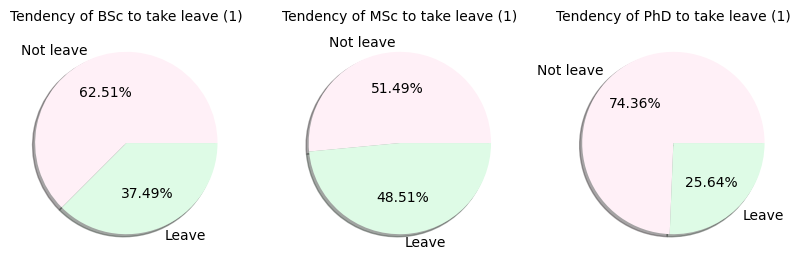

In [13]:
df_lE=df.groupby(['Education','LeaveOrNot'])[['Education']].count()
df_lE.rename(columns={'Education':'Count'}, inplace=True)
df_lE.reset_index(inplace=True)

fig, ax = plt.subplots(1,3,figsize=(10, 7))
ax[0].pie(df_lE.iloc[0:2,2], labels=['Not leave', 'Leave'] ,colors=['#fff0f7','#defbe6'], autopct='%1.2f%%', shadow=True)
ax[0].set_title('Tendency of BSc to take leave (1)', fontsize='10')

ax[1].pie(df_lE.iloc[2:4,2], labels=['Not leave', 'Leave'] ,colors=['#fff0f7','#defbe6'], autopct='%1.2f%%', shadow=True)
ax[1].set_title('Tendency of MSc to take leave (1)', fontsize='10')

ax[2].pie(df_lE.iloc[4:6,2], labels=['Not leave', 'Leave'] ,colors=['#fff0f7','#defbe6'], autopct='%1.2f%%', shadow=True)
ax[2].set_title('Tendency of PhD to take leave (1)', fontsize='10')

plt.show()

* The pie charts, presented from left to right, display the leave tendencies among employees holding B.Sc., M.Sc., and Ph.D. degrees.
* Employees with Ph.D. degrees (25.64%) exhibit a lower propensity for taking leave compared to those with M.Sc. (48.51%) and B.Sc. degrees (37.49%).
* Thus, employees with Ph.D. degree display significantly less take-leave behavior.

### 8. Are there any noticeable disparities in leave behavior between employees in different cities?

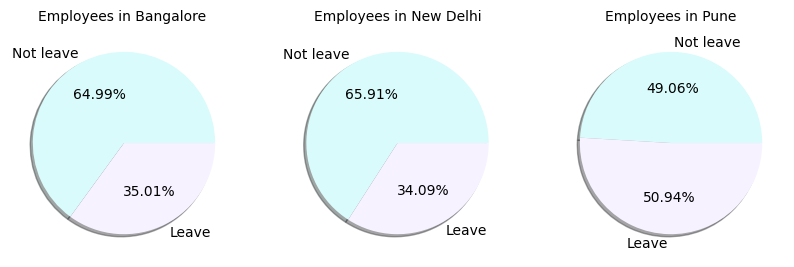

In [14]:
df_lCity=df.groupby(['City','LeaveOrNot'])[['City']].count()
df_lCity.rename(columns={'City':'Count'}, inplace=True)
df_lCity.reset_index(inplace=True)

fig, ax = plt.subplots(1,3,figsize=(10, 15))
ax[0].pie(df_lCity.iloc[0:2,2], labels=['Not leave', 'Leave'] ,colors=['#d9fbfb','#f6f2ff'], autopct='%1.2f%%', shadow=True)
ax[0].set_title('Employees in Bangalore ', fontsize='10')

ax[1].pie(df_lCity.iloc[2:4,2], labels=['Not leave', 'Leave'] ,colors=['#d9fbfb','#f6f2ff'], autopct='%1.2f%%', shadow=True)
ax[1].set_title('Employees in New Delhi', fontsize='10')

ax[2].pie(df_lCity.iloc[4:6,2], labels=['Not leave', 'Leave'] ,colors=['#d9fbfb','#f6f2ff'], autopct='%1.2f%%', shadow=True)
ax[2].set_title('Employees in Pune', fontsize='10')

plt.show()



* The pie charts, presented from left to right, reflect the leave tendencies among employees located in Bangalore, New Delhi, and Pune.
* Employees in New Delhi (34.09% of the total employees in New Delhi) and Bangalore (35.01% of the total in Bangalore) are less inclined to take leave compared to those in Pune (50.94% of the total there).
* Thus, employees in Pune are significantly more likely to take leave.

### 9. How does the percentage of leave-taking behavior differ between female and male employees?

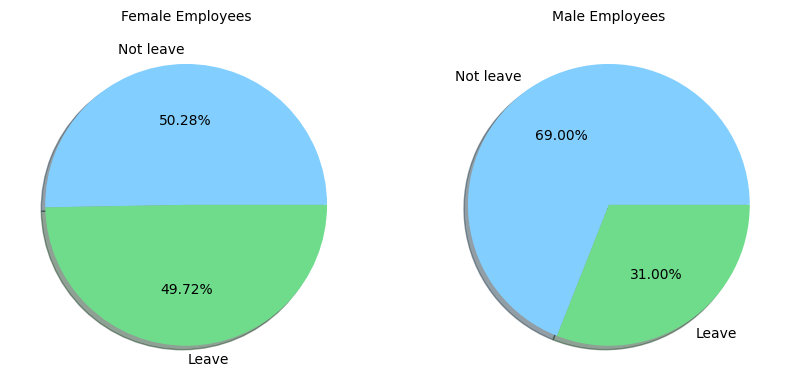

In [15]:
df_lGender=df.groupby(['Gender','LeaveOrNot'])[['Gender']].count()
df_lGender.rename(columns={'Gender':'Count'}, inplace=True)
df_lGender.reset_index(inplace=True)

fig, ax = plt.subplots(1,2,figsize=(10, 7))
ax[0].pie(df_lGender.iloc[0:2,2], labels=['Not leave', 'Leave'] ,colors=['#82cfff','#6fdc8c'], autopct='%1.2f%%', shadow=True)
ax[0].set_title('Female Employees', fontsize='10')

ax[1].pie(df_lGender.iloc[2:4,2], labels=['Not leave', 'Leave'] ,colors=['#82cfff','#6fdc8c'], autopct='%1.2f%%', shadow=True)
ax[1].set_title('Male Employees', fontsize='10')


plt.show()



* The pie charts depict the percentage of leave-taking behavior among female employees (left) and male employees (right).

* 49.72% of female employees exhibit leave-taking behavior, while 31.00% of male employees take leave.

* Thus, male employees are less likely to take leave in comparison to female employees.

### 10. What conclusions can be drawn regarding the effect of assigning temporary tasks on leave-taking behavior?

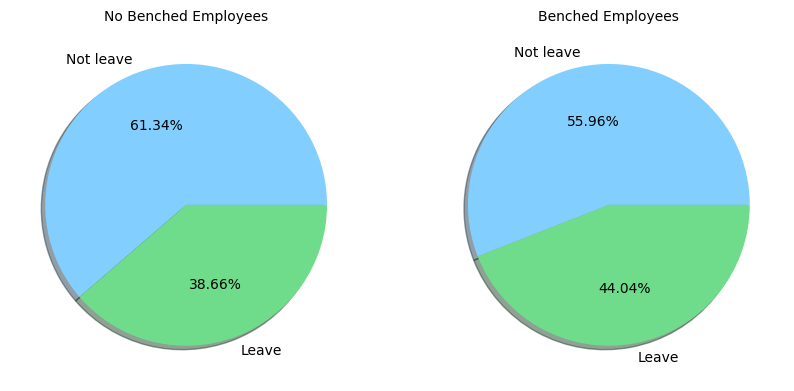

In [16]:
df_lEB=df.groupby(['EverBenched','LeaveOrNot'])[['EverBenched']].count()
df_lEB.rename(columns={'EverBenched':'Count'}, inplace=True)
df_lEB.reset_index(inplace=True)

fig, ax = plt.subplots(1,2,figsize=(10, 7))
ax[0].pie(df_lEB.iloc[0:2,2], labels=['Not leave', 'Leave'] ,colors=['#82cfff','#6fdc8c'], autopct='%1.2f%%', shadow=True)
ax[0].set_title('No Benched Employees', fontsize='10')

ax[1].pie(df_lEB.iloc[2:4,2], labels=['Not leave', 'Leave'] ,colors=['#82cfff','#6fdc8c'], autopct='%1.2f%%', shadow=True)
ax[1].set_title('Benched Employees', fontsize='10')


plt.show()

* The pie charts illustrate the percentage of employees taking leave in scenarios without temporary tasks (left) and with temporary tasks (right).
* 38.66% of employees with any temporary tasks exhibit leave-taking behavior, while 44.04% of employees without temporary tasks display leave-taking behavior.
* These findings suggest that assigning temporary tasks to employees slightly decreases leave-taking behavior.

## Summary

Herein, it is aimed to address 

* the gender distribution

* the distribution of educational qualifications among employees

* the distribution of educational qualifications among employees by gender

* the number of recruited employees over the years

* the correlation between payment tier and experience in the current domain

* patterns in leave-taking behavior among employees.

The analysis of the dataset shows that the majority of employees are male. In the company, employees with a BSc degree alone are more prevalent. The majority of the current employees were recruited in 2017. No correlation between experience in the current domain and payment tier is detected in the company. 

Leave-taking behavior are not strongly correlated with joining year, payment tier, age, and experience in domain. However, PhDs in the company are less likely to take leave than MSc and BSc. Employees in Pune are the most likely to take leave compared to New Delhi and Pune. The comparison of male employees taking leave with female employees uncovers male employees display less take leave behavior. The assigned temporary task ends up with less take leave behavior.